In [1]:
# my imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot  as plt

In [2]:
# callbacks 
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) =mnist.load_data()
class MyCallBacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs ={}):
        if (logs.get('loss')<0.05):
            print('accuracy of about 95 percent reached , cancel training .')
            self.model.stop_training = True
            
callback = MyCallBacks()
mod = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

mod.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy','mse'])
mod.fit(training_images, training_labels , epochs = 10 ,callbacks = [callback])
print('-----------'*10)
print('evaluations')
mod.evaluate(test_images, test_labels)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 3.0810 - accuracy: 0.6680 - mse: 27.6668
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7514 - accuracy: 0.7291 - mse: 27.6668
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6341 - accuracy: 0.7694 - mse: 27.6714
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5962 - accuracy: 0.7880 - mse: 27.6730
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5677 - accuracy: 0.7964 - mse: 27.6743
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5592 - accuracy: 0.7982 - mse: 27.6749
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5432 - accuracy: 0.8037 - mse: 27.6755
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5467 - accuracy: 0.8040 - mse: 27.6758
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/s

[0.6477137804031372, 0.7847999930381775, 27.676088333129883]

In [20]:
print(max(mod.predict(test_images)[1]))
print(mod.predict(test_images)[1])
print(test_labels[1])

0.7407385
[1.61438862e-08 1.43542884e-08 7.40738511e-01 2.47675143e-05
 2.56688625e-01 1.68397747e-30 2.54819077e-03 0.00000000e+00
 1.09538194e-11 0.00000000e+00]
2


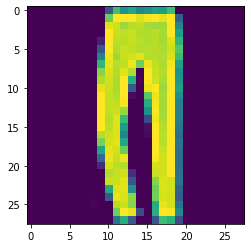

In [16]:
plt.imshow(test_images[2])

In [2]:

mnist = tf.keras.datasets.fashion_mnist

In [3]:
(training_images, training_labels), (test_images, test_labels)= mnist.load_data() 


This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories,
along with a test set of 10,000 images. This dataset can be used as
a drop-in replacement for MNIST. The class labels are:

| Label | Description |
|:-----:|-------------|
|   0   | T-shirt/top |
|   1   | Trouser     |
|   2   | Pullover    |
|   3   | Dress       |
|   4   | Coat        |
|   5   | Sandal      |
|   6   | Shirt       |
|   7   | Sneaker     |
|   8   | Bag         |
|   9   | Ankle boot  |

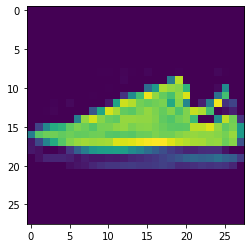

In [4]:
np.set_printoptions(linewidth=200)
plt.imshow(training_images[6])

In [5]:
training_images = training_images/255.0
test_images= test_images / 255.0


In [6]:
# designing the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')  #tf.nn.softmax
])

In [7]:
model.compile(optimizer="Adam" , loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5002 - accuracy: 0.8257
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3751 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3391 - accuracy: 0.8758
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3135 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2957 - accuracy: 0.8904
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2801 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2705 - accuracy: 0.8998
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2561 - accuracy: 0.9048
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2456 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.240

In [8]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 2ms/step - loss: 0.3265 - accuracy: 0.8850


[0.3264952003955841, 0.8849999904632568]

In [9]:
classification = model.predict(test_images)
classification[3]

array([2.8068042e-08, 9.9999380e-01, 5.0826423e-11, 6.0553989e-06, 3.4562959e-08, 5.1528122e-16, 1.0159761e-07, 7.9251399e-21, 5.1582728e-11, 1.3671893e-15], dtype=float32)

In [10]:
test_labels[3]

1

0.9999938
1


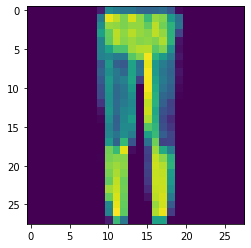

In [11]:
print(np.amax(model.predict(test_images)[3]))
print(test_labels[3])
plt.imshow(test_images[3])


In [12]:
mnist = tf.keras.datasets.mnist

In [13]:
import time 

In [14]:
# the second model. it is called model 2
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images/255.0
test_images = test_images /255.0

model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.Dense(10,  activation = 'softmax')
])

model2.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy','mse'])
model2.fit(training_images, training_labels , epochs = 4)

Epoch 1/4
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1839 - accuracy: 0.9455 - mse: 27.3844
Epoch 2/4
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0760 - accuracy: 0.9764 - mse: 27.3905
Epoch 3/4
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0484 - accuracy: 0.9846 - mse: 27.3918
Epoch 4/4
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0357 - accuracy: 0.9885 - mse: 27.3926 4s - loss: 0.0345 - accuracy: - ETA: 3s - loss: 0.0342 - accuracy: 0 - ETA: 2s - loss: 


In [17]:
class MyCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('loss')<0.05):
            print('Training reached more an accuracy of 95% . Cancelling the traing')
            self.model.stop_training = True
            
callback = MyCallbacks()
model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128 , activation = 'relu'),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(10 , activation = 'relu')
])

model3.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy','mse'])



model3.fit(training_images, training_labels, epochs=5 , callbacks=[callback])
model3.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3361 - accuracy: 0.1035 - mse: 28.1731
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3005 - accuracy: 0.0987 - mse: 28.1853
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3026 - accuracy: 0.0987 - mse: 28.1853
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3026 - accuracy: 0.0987 - mse: 28.1853
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.0980 - mse: 28.1290


[2.30259108543396, 0.09799999743700027, 28.128999710083008]

In [18]:
class MyCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch , logs = {}):
        if (logs.get('loss')<0.5):
            print('Cancelling traing ,Training reached an accuracy of 50%')
            self.model.stop_training = True
            
callback = MyCallbacks()
model_6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')
])
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10,callbacks=[callback])

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3507 - accuracy: 0.9026


In [3]:
kljk;;;;;;;;;;;;;;

NameError: name 'logs' is not defined